## Ejercicio 7.31
*Kassimali, A. (2012). Matrix Analysis of Structures. 2nd Edition. Cengage Learning.*

![NON](img/ejercicio_7.31.png)

In [1]:
from PyStructMatrix import StructuralMatrixAnalysis, StructuralPlotter

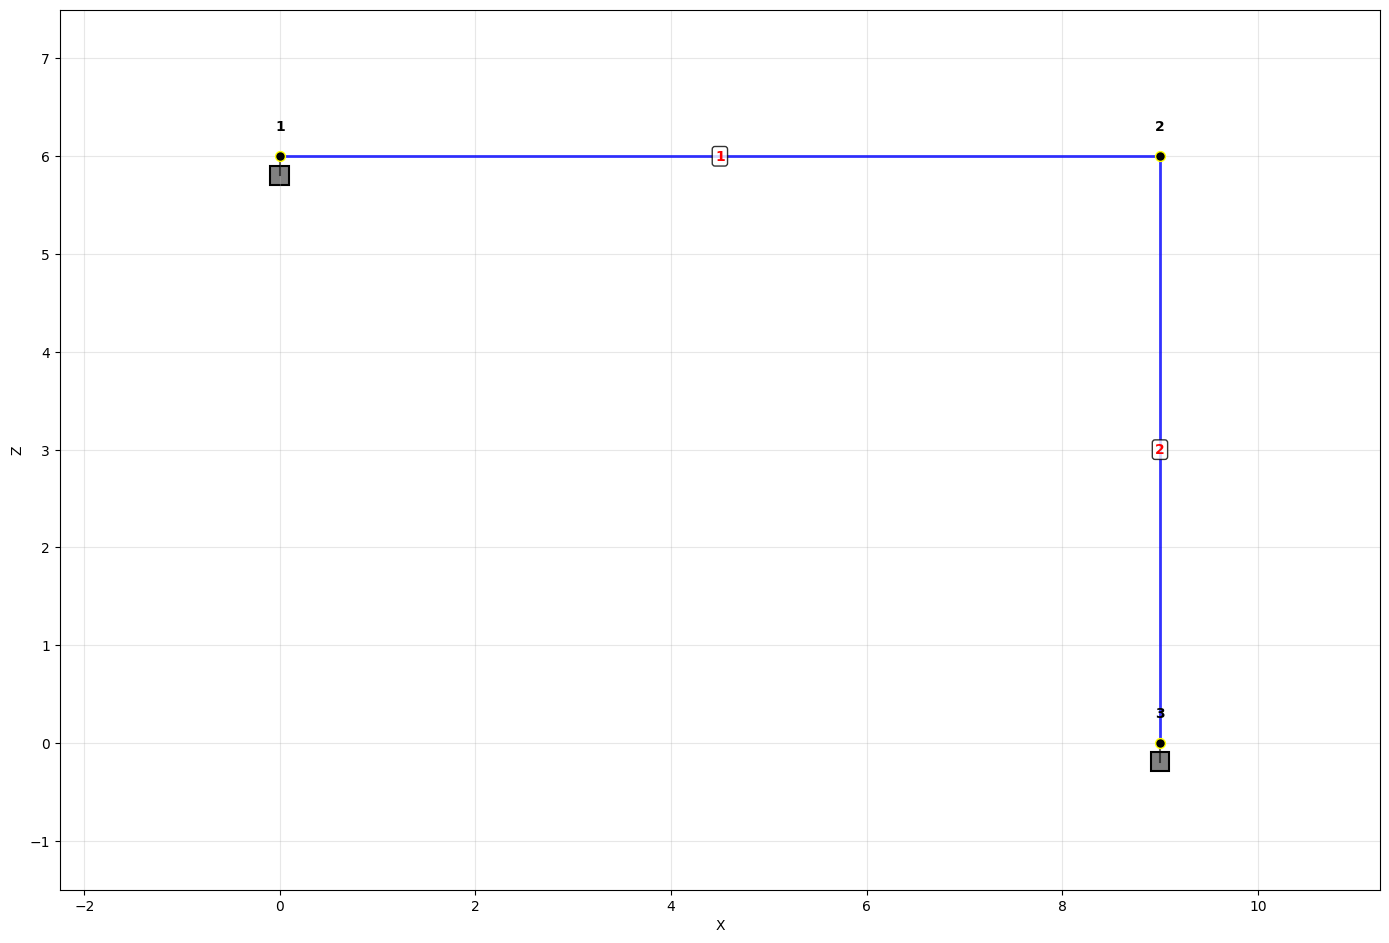

In [2]:
# Crear el sistema estructural
system = StructuralMatrixAnalysis()
plotter = StructuralPlotter(system)

# Definir propiedades del material y secciones
E = 200 * 1e6
A = 7610 * 1e-6
I = 216 * 1e-6


# Definición de Nodos (Geometría)
system.defineNode(1, x=0, z=6)
system.defineNode(2, x=9, z=6)
system.defineNode(3, x=9, z=0)

# Asignación de Restricciones (Condiciones de Apoyo)
system.assignJoint.restrictions(1, ux=True, uz=True, ry=True)
system.assignJoint.restrictions(3, ux=True, uz=True, ry=True)

# Definición de Elementos (Conectividad)
system.defineElement(1, 1, 2, A=A, E=E, I=I)
system.defineElement(2, 2, 3, A=A, E=E, I=I)

# Asignación de Cargas
system.assignElement.temperatureLoad(1, dT=50, alpha=1.2e-5)
system.assignElement.temperatureLoad(2, dT=50, alpha=1.2e-5)

# Visualización Inicial
plotter.showFrame()

In [3]:
# Ejecución del Análisis Matricial
system.RunCompleteAnalysis(show_process=True)


--------------------------------------------------------------------------------
 1. INFORMACIÓN GENERAL
--------------------------------------------------------------------------------
Número de nodos: 3
Número de elementos: 2
Grados de libertad totales: 9
Grados de libertad restringidos (desplazamientos conocidos): 6 de 9
GL restringidos: [0 1 2 6 7 8]
Grados de libertad libres (fuerzas conocidas): 3 de 9
GL libres: [3 4 5]

--------------------------------------------------------------------------------
 2. MATRICES PARTICIONADAS
--------------------------------------------------------------------------------
KAA (3x3):
  |         3 |          4 |          5 |

  |     171511 |          0 |       7200 |
  |          0 |     254378 |      -3200 |
  |       7200 |      -3200 |      48000 |
 
KAB (3x6):
  |         0 |          1 |          2 |          6 |          7 |          8 |
 
  |    -169111 |          0 |          0 |      -2400 |          0 |       7200 |
  |          0 |  

In [4]:
# Obtención de Resultados Detallados de Elementos
system.getInfoElements()

ELEMENTO 1: [1, 2]  - Tipo 0
PROPIEDADES
  Longitud: 9.000
  Área (A): 7.6100e-03
  Módulo elástico (E): 2.0000e+08
  Momento de inercia (I): 2.1600e-04
  Liberaciones:  Nodo i = NO | Nodo j = NO
  Orientación: C=1.000 | S=0.000

CARGAS APLICADAS:
  1) Variación térmica: ΔT=50.000

MATRIZ DE TRANSFORMACIÓN T (6x6):
  |      1.000 |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |     -0.000 |      1.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |     -0.000 |      1.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |      1.000 |

MATRIZ DE RIGIDEZ LOCAL K (6x6):
  | 169111.111 |      0.000 |      0.000 | -169111.111 |      0.000 |      0.000 |
  |      0.000 |    711.111 |   3200.000 |      0.000 |   -711.111 |   320

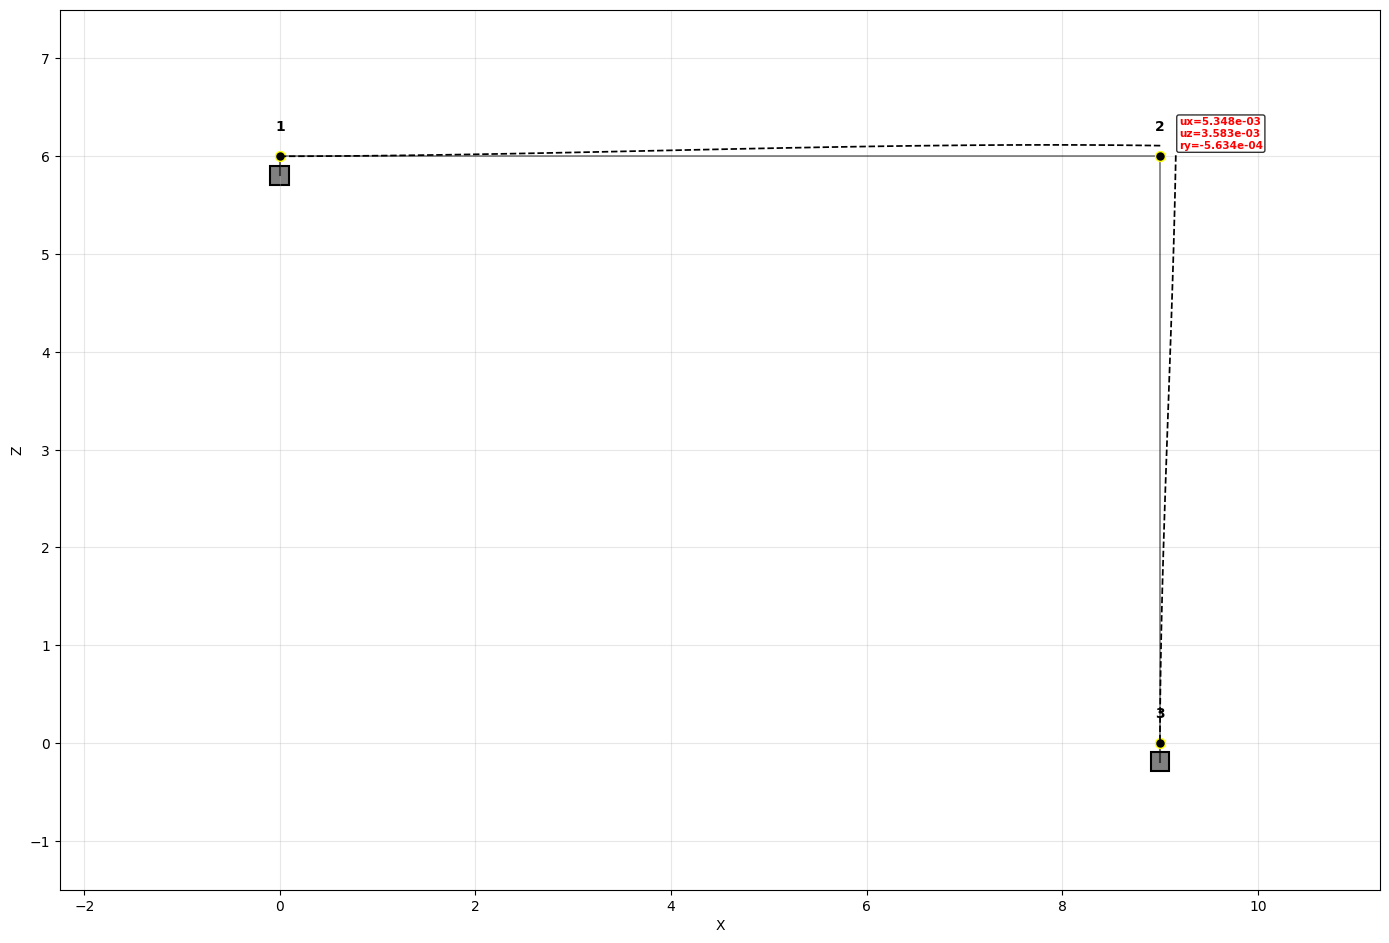

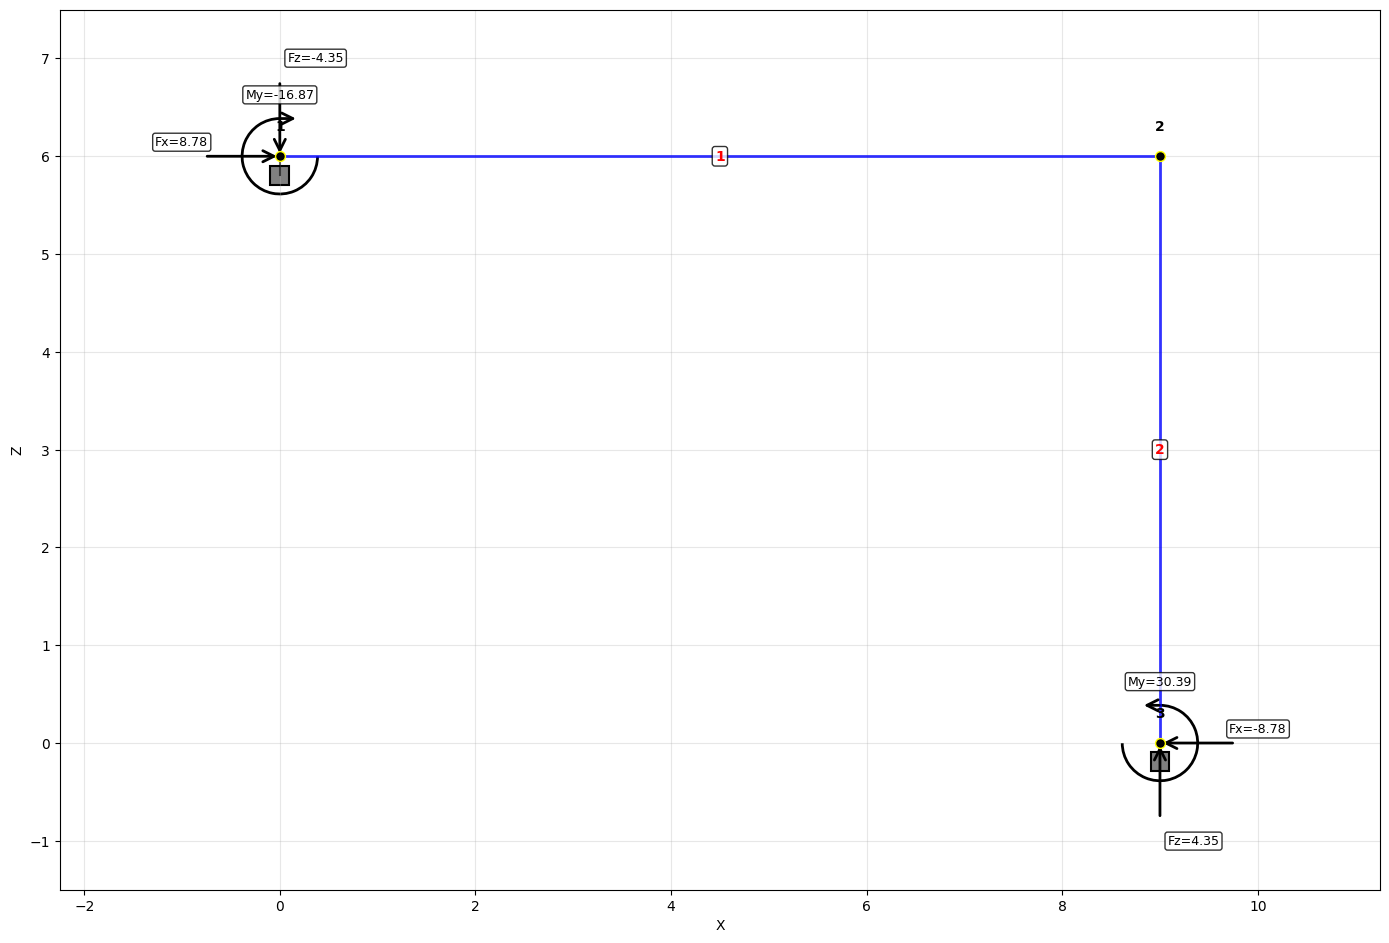

In [5]:
# Visualización de Resultados
plotter.showDeformedShape(escala=0.02)
plotter.showReactions()